In [82]:
#dependencies
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k

In [83]:
df = pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [84]:
#shape of data
df.shape

(400, 26)

In [85]:
#columns that I will keep
columns_to_retain = ['sg', 'al', 'sc', 'hemo', 'pcv', 'htn', 'classification']

#after droping unnecessary columns, new dataset
df = df.drop([col for col in df.columns if not col in columns_to_retain], axis=1)

#drop the rows with missing values
df = df.dropna(axis=0)

In [86]:
#transform the non-numeric data in the columns into number
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


In [87]:
#after cleaning the dataset(Here, htn value 1 means yes. But classification value 0 means disease detected)
df.head()

,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,28,1,0
1,1.020,4.0,0.8,11.3,22,0,0
2,1.010,2.0,1.8,9.6,15,0,0
3,1.005,4.0,3.8,11.2,16,1,0
4,1.010,2.0,1.4,11.6,19,0,0


In [88]:
#splitting the dataset into independant (x) data set for the features and dependant (y) dataset for the target
x = df.drop(['classification'], axis=1)
y = df['classification']

In [89]:
#scaling the dataset to bring all the values between 0 and 1
x_scaler = MinMaxScaler()
x_scaler.fit(x)
column_names = x.columns
x[column_names] = x_scaler.transform(x)

In [90]:
#split data into train, test and shuffle
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True)

In [91]:
#building model
model = Sequential()
model.add(Dense(256, input_dim = len(x.columns), kernel_initializer=k.initializers.random_normal(seed=13),activation='relu'))
model.add(Dense(1, activation = 'hard_sigmoid'))

In [92]:
#compile the model
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [93]:
#train the model
history = model.fit(x_train, y_train, epochs = 1000, batch_size = x_train.shape[0])

Epoch 1/1000
229/229 [==============================] - 0s 341us/step - loss: 0.7026 - accuracy: 0.4716
Epoch 2/1000
229/229 [==============================] - 0s 0us/step - loss: 0.6963 - accuracy: 0.4760
Epoch 3/1000
229/229 [==============================] - 0s 4us/step - loss: 0.6901 - accuracy: 0.4760
Epoch 4/1000
229/229 [==============================] - 0s 9us/step - loss: 0.6840 - accuracy: 0.4803
Epoch 5/1000
229/229 [==============================] - 0s 4us/step - loss: 0.6780 - accuracy: 0.5197
Epoch 6/1000
229/229 [==============================] - 0s 9us/step - loss: 0.6720 - accuracy: 0.5808
Epoch 7/1000
229/229 [==============================] - 0s 9us/step - loss: 0.6661 - accuracy: 0.6550
Epoch 8/1000
229/229 [==============================] - 0s 9us/step - loss: 0.6603 - accuracy: 0.6943
Epoch 9/1000
229/229 [==============================] - 0s 9us/step - loss: 0.6544 - accuracy: 0.7249
Epoch 10/1000
229/229 [==============================] - 0s 13us/step - loss: 0.

Epoch 81/1000
229/229 [==============================] - 0s 9us/step - loss: 0.1964 - accuracy: 0.9039
Epoch 82/1000
229/229 [==============================] - 0s 9us/step - loss: 0.1929 - accuracy: 0.9039
Epoch 83/1000
229/229 [==============================] - 0s 9us/step - loss: 0.1895 - accuracy: 0.9039
Epoch 84/1000
229/229 [==============================] - 0s 4us/step - loss: 0.1863 - accuracy: 0.9039
Epoch 85/1000
229/229 [==============================] - 0s 4us/step - loss: 0.1833 - accuracy: 0.9039
Epoch 86/1000
229/229 [==============================] - 0s 9us/step - loss: 0.1804 - accuracy: 0.9083
Epoch 87/1000
229/229 [==============================] - 0s 4us/step - loss: 0.1777 - accuracy: 0.9083
Epoch 88/1000
229/229 [==============================] - 0s 4us/step - loss: 0.1751 - accuracy: 0.9083
Epoch 89/1000
229/229 [==============================] - 0s 9us/step - loss: 0.1726 - accuracy: 0.9127
Epoch 90/1000
229/229 [==============================] - 0s 9us/step - lo

Epoch 160/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0884 - accuracy: 0.9651
Epoch 161/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0879 - accuracy: 0.9651
Epoch 162/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0874 - accuracy: 0.9651
Epoch 163/1000
229/229 [==============================] - 0s 4us/step - loss: 0.0869 - accuracy: 0.9651
Epoch 164/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0864 - accuracy: 0.9651
Epoch 165/1000
229/229 [==============================] - 0s 4us/step - loss: 0.0859 - accuracy: 0.9651
Epoch 166/1000
229/229 [==============================] - 0s 4us/step - loss: 0.0855 - accuracy: 0.9651
Epoch 167/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0850 - accuracy: 0.9651
Epoch 168/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0845 - accuracy: 0.9651
Epoch 169/1000
229/229 [==============================] - 0s 4us

Epoch 239/1000
229/229 [==============================] - 0s 4us/step - loss: 0.0594 - accuracy: 0.9782
Epoch 240/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0591 - accuracy: 0.9782
Epoch 241/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0588 - accuracy: 0.9782
Epoch 242/1000
229/229 [==============================] - 0s 4us/step - loss: 0.0585 - accuracy: 0.9782
Epoch 243/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0582 - accuracy: 0.9782
Epoch 244/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0579 - accuracy: 0.9782
Epoch 245/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0576 - accuracy: 0.9782
Epoch 246/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0574 - accuracy: 0.9782
Epoch 247/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0571 - accuracy: 0.9782
Epoch 248/1000
229/229 [==============================] - 0s 9us

Epoch 318/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0433 - accuracy: 0.9782
Epoch 319/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0431 - accuracy: 0.9782
Epoch 320/1000
229/229 [==============================] - 0s 8us/step - loss: 0.0430 - accuracy: 0.9782
Epoch 321/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0429 - accuracy: 0.9782
Epoch 322/1000
229/229 [==============================] - 0s 4us/step - loss: 0.0427 - accuracy: 0.9782
Epoch 323/1000
229/229 [==============================] - 0s 4us/step - loss: 0.0426 - accuracy: 0.9782
Epoch 324/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0424 - accuracy: 0.9782
Epoch 325/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0423 - accuracy: 0.9782
Epoch 326/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0422 - accuracy: 0.9782
Epoch 327/1000
229/229 [==============================] - 0s 4us

Epoch 397/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0344 - accuracy: 0.9825
Epoch 398/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0343 - accuracy: 0.9825
Epoch 399/1000
229/229 [==============================] - 0s 4us/step - loss: 0.0342 - accuracy: 0.9825
Epoch 400/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0341 - accuracy: 0.9825
Epoch 401/1000
229/229 [==============================] - 0s 4us/step - loss: 0.0340 - accuracy: 0.9825
Epoch 402/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0340 - accuracy: 0.9825
Epoch 403/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0339 - accuracy: 0.9825
Epoch 404/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0338 - accuracy: 0.9825
Epoch 405/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0337 - accuracy: 0.9825
Epoch 406/1000
229/229 [==============================] - 0s 9us

Epoch 476/1000
229/229 [==============================] - 0s 4us/step - loss: 0.0290 - accuracy: 0.9825
Epoch 477/1000
229/229 [==============================] - 0s 4us/step - loss: 0.0290 - accuracy: 0.9825
Epoch 478/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0289 - accuracy: 0.9825
Epoch 479/1000
229/229 [==============================] - 0s 4us/step - loss: 0.0289 - accuracy: 0.9825
Epoch 480/1000
229/229 [==============================] - 0s 4us/step - loss: 0.0288 - accuracy: 0.9825
Epoch 481/1000
229/229 [==============================] - 0s 13us/step - loss: 0.0288 - accuracy: 0.9825
Epoch 482/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0287 - accuracy: 0.9825
Epoch 483/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0287 - accuracy: 0.9825
Epoch 484/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0286 - accuracy: 0.9825
Epoch 485/1000
229/229 [==============================] - 0s 9u

Epoch 555/1000
229/229 [==============================] - 0s 4us/step - loss: 0.0259 - accuracy: 0.9825
Epoch 556/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0259 - accuracy: 0.9825
Epoch 557/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0258 - accuracy: 0.9825
Epoch 558/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0258 - accuracy: 0.9825
Epoch 559/1000
229/229 [==============================] - 0s 4us/step - loss: 0.0258 - accuracy: 0.9825
Epoch 560/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0258 - accuracy: 0.9825
Epoch 561/1000
229/229 [==============================] - 0s 4us/step - loss: 0.0257 - accuracy: 0.9825
Epoch 562/1000
229/229 [==============================] - 0s 4us/step - loss: 0.0257 - accuracy: 0.9825
Epoch 563/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0257 - accuracy: 0.9825
Epoch 564/1000
229/229 [==============================] - 0s 4us

Epoch 634/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0238 - accuracy: 0.9869
Epoch 635/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0238 - accuracy: 0.9869
Epoch 636/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0238 - accuracy: 0.9869
Epoch 637/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0237 - accuracy: 0.9869
Epoch 638/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0237 - accuracy: 0.9869
Epoch 639/1000
229/229 [==============================] - 0s 8us/step - loss: 0.0237 - accuracy: 0.9869
Epoch 640/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0237 - accuracy: 0.9869
Epoch 641/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0237 - accuracy: 0.9869
Epoch 642/1000
229/229 [==============================] - 0s 4us/step - loss: 0.0236 - accuracy: 0.9869
Epoch 643/1000
229/229 [==============================] - 0s 4us

Epoch 713/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0222 - accuracy: 0.9869
Epoch 714/1000
229/229 [==============================] - 0s 8us/step - loss: 0.0222 - accuracy: 0.9869
Epoch 715/1000
229/229 [==============================] - 0s 4us/step - loss: 0.0221 - accuracy: 0.9869
Epoch 716/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0221 - accuracy: 0.9869
Epoch 717/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0221 - accuracy: 0.9869
Epoch 718/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0221 - accuracy: 0.9869
Epoch 719/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0220 - accuracy: 0.9869
Epoch 720/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0220 - accuracy: 0.9869
Epoch 721/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0220 - accuracy: 0.9869
Epoch 722/1000
229/229 [==============================] - 0s 9us

Epoch 792/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0208 - accuracy: 0.9869
Epoch 793/1000
229/229 [==============================] - 0s 4us/step - loss: 0.0208 - accuracy: 0.9869
Epoch 794/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0208 - accuracy: 0.9869
Epoch 795/1000
229/229 [==============================] - 0s 4us/step - loss: 0.0207 - accuracy: 0.9869
Epoch 796/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0207 - accuracy: 0.9869
Epoch 797/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0207 - accuracy: 0.9869
Epoch 798/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0207 - accuracy: 0.9869
Epoch 799/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0207 - accuracy: 0.9869
Epoch 800/1000
229/229 [==============================] - 0s 4us/step - loss: 0.0207 - accuracy: 0.9869
Epoch 801/1000
229/229 [==============================] - 0s 9us

Epoch 871/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0195 - accuracy: 0.9869
Epoch 872/1000
229/229 [==============================] - 0s 4us/step - loss: 0.0195 - accuracy: 0.9869
Epoch 873/1000
229/229 [==============================] - 0s 4us/step - loss: 0.0195 - accuracy: 0.9869
Epoch 874/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0195 - accuracy: 0.9869
Epoch 875/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0195 - accuracy: 0.9869
Epoch 876/1000
229/229 [==============================] - 0s 13us/step - loss: 0.0195 - accuracy: 0.9869
Epoch 877/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0194 - accuracy: 0.9869
Epoch 878/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0194 - accuracy: 0.9869
Epoch 879/1000
229/229 [==============================] - 0s 4us/step - loss: 0.0194 - accuracy: 0.9869
Epoch 880/1000
229/229 [==============================] - 0s 9u

Epoch 950/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0183 - accuracy: 0.9869
Epoch 951/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0183 - accuracy: 0.9869
Epoch 952/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0183 - accuracy: 0.9869
Epoch 953/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0183 - accuracy: 0.9869
Epoch 954/1000
229/229 [==============================] - 0s 4us/step - loss: 0.0182 - accuracy: 0.9869
Epoch 955/1000
229/229 [==============================] - 0s 4us/step - loss: 0.0182 - accuracy: 0.9869
Epoch 956/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0182 - accuracy: 0.9869
Epoch 957/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0182 - accuracy: 0.9869
Epoch 958/1000
229/229 [==============================] - 0s 9us/step - loss: 0.0182 - accuracy: 0.9869
Epoch 959/1000
229/229 [==============================] - 0s 4us

In [94]:
#save the model
#model.save('ckd.model')

Text(0.5, 0, 'epoch')

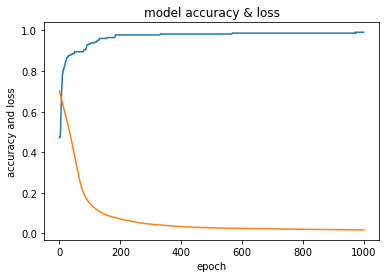

In [95]:
#visualize the models loss and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy & loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')

In [96]:
#Shape of training and testing data
print('shape of train data:', x_train.shape)
print('shape of test data:', x_test.shape)

shape of train data: (229, 6)
shape of test data: (58, 6)


In [97]:
#Showing the actual and predicted values
pred = model.predict(x_test)
pred = [1 if y>=0.5 else 0 for y in pred]
pred

print('Original: {0}'.format(",".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(",".join(str(x) for x in pred)))

Original: 0,1,1,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,1,1,0,0,0,1,0
Predicted: 0,1,1,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,1,1,0,0,0,1,0
